<a href="https://colab.research.google.com/github/huyg1108/fruit-fresh-rotten/blob/main/fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fruits fresh and rotten

## Import library

In [ ]:
import os
import cv2
import zipfile
import random
import tempfile
from google.colab import files
from random import shuffle
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Download dataset

In [ ]:
!pip install kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"huyg1108","key":"8f0c2c5ab6b826e92d788ee4ce79693c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# download dataset
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [01:05<00:00, 41.8MB/s]



In [ ]:
# extract file .zip
with zipfile.ZipFile("fruits-fresh-and-rotten-for-classification.zip","r") as zip_ref:
  zip_ref.extractall("/tmp")

## Import dataset

In [ ]:
classes = ['freshapples', 'freshbanana','freshoranges','rottenapples','rottenbanana','rottenoranges']

In [ ]:
# load train set
def load_data_train():
  x,y = [],[]
  z = []
  for i in tqdm(os.listdir('/tmp/dataset/train')):
    if classes[0] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main,img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,0])
    elif classes[1] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main,img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,1])
    elif classes[2] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,2])
    elif classes[3] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,3])
    elif classes[4] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,4])
    elif classes[5] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,5])

  shuffle(z)
  for images, labels in tqdm(z):
      x.append(images)
      y.append(labels)
  return x,y
  
# load test set
def load_data_test():
  x,y = [],[]
  z = []
  for i in tqdm(os.listdir('/tmp/dataset/test')):
    if classes[0] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,0])
    elif classes[1] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,1])
    elif classes[2] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,2])
    elif classes[3] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,3])
    elif classes[4] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,4])
    elif classes[5] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,5])

  shuffle(z)
  for images, labels in tqdm(z):
      x.append(images)
      y.append(labels)
  return x,y

In [ ]:
x_train, y_train = load_data_train()
x_test, y_test = load_data_test()

100%|██████████| 4439/4439 [00:00<00:00, 1129901.41it/s]


## Handling dataset

In [ ]:
# chuyển thành numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

### Splitting dataset

In [ ]:
# validation set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, stratify=y_train, test_size=0.4, shuffle=True, random_state=42
)

print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_val shape:',x_val.shape)
print('y_val shape:',y_val.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (6540, 100, 100, 3)
y_train shape: (6540,)
x_val shape: (4361, 100, 100, 3)
y_val shape: (4361,)
x_test shape: (4439, 100, 100, 3)
y_test shape: (4439,)


### Preprocessing data

In [ ]:
# scale x
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

# one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

## Training model

In [ ]:
from tensorflow.random import set_seed
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import *

### Sequential model

In [ ]:
set_seed(42)
np.random.seed(42)
clear_session()

# model structure
model = Sequential()

model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(256,3,padding='same',activation='relu'))
model.add(MaxPool2D())

model.add(GlobalAvgPool2D())
model.add(Dense(512,activation='relu'))
model.add(Dense(6,activation='softmax'))

### Transfer learning

In [ ]:
from tensorflow.keras.applications import InceptionV3
import pandas as pd

pretrained_model = InceptionV3(input_shape=(100,100,3),
                                include_top=False)

for layer in pretrained_model.layers:
    layer.trainable = False

x = tf.keras.layers.Flatten()(pretrained_model.output)
x = tf.keras.layers.Dense(1028, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)

model = tf.keras.Model(pretrained_model.input, x) 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pretrained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd3f00b2950>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3f0af88d0>,conv2d_4,False
2,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd3f11e9f10>,batch_normalization,False
3,<tensorflow.python.keras.layers.core.Activation object at 0x7fd3ef72c490>,activation,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3f11e5150>,conv2d_5,False
...,...,...,...
306,<tensorflow.python.keras.layers.core.Activation object at 0x7fd67a042ed0>,activation_85,False
307,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7fd5ca1c5c90>,mixed9_1,False
308,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7fd3f0c4b7d0>,concatenate_1,False
309,<tensorflow.python.keras.layers.core.Activation object at 0x7fd3e9530b10>,activation_93,False


In [ ]:
stop =  EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train_ohe,
    steps_per_epoch = (x_train.shape[0]/32),
    epochs=20,
    verbose=1,
    callbacks=[stop],
    validation_data = (x_val, y_val_ohe),
    validation_steps = (x_val.shape[0]/32)
)

Epoch 1/20
204/204 [==============================] - 15s 45ms/step - loss: 1.1701 - accuracy: 0.7347 - val_loss: 0.2562 - val_accuracy: 0.9053
Epoch 2/20
204/204 [==============================] - 7s 36ms/step - loss: 0.1892 - accuracy: 0.9314 - val_loss: 0.2019 - val_accuracy: 0.9303
Epoch 3/20
204/204 [==============================] - 7s 36ms/step - loss: 0.1520 - accuracy: 0.9418 - val_loss: 0.1915 - val_accuracy: 0.9312
Epoch 4/20
204/204 [==============================] - 7s 36ms/step - loss: 0.0903 - accuracy: 0.9666 - val_loss: 0.1907 - val_accuracy: 0.9303
Epoch 5/20
204/204 [==============================] - 7s 36ms/step - loss: 0.0848 - accuracy: 0.9696 - val_loss: 0.2097 - val_accuracy: 0.9324
Epoch 6/20
204/204 [==============================] - 7s 36ms/step - loss: 0.0462 - accuracy: 0.9841 - val_loss: 0.3390 - val_accuracy: 0.8991
Epoch 7/20
204/204 [==============================] - 7s 36ms/step - loss: 0.0474 - accuracy: 0.9843 - val_loss: 0.1404 - val_accuracy: 0.949

## Evaluate Model

### Accuracy

In [ ]:
model.evaluate(x_test, y_test_ohe)

139/139 [==============================] - 3s 22ms/step - loss: 0.1086 - accuracy: 0.9655


[0.1085987314581871, 0.9655327796936035]

### Learning curve

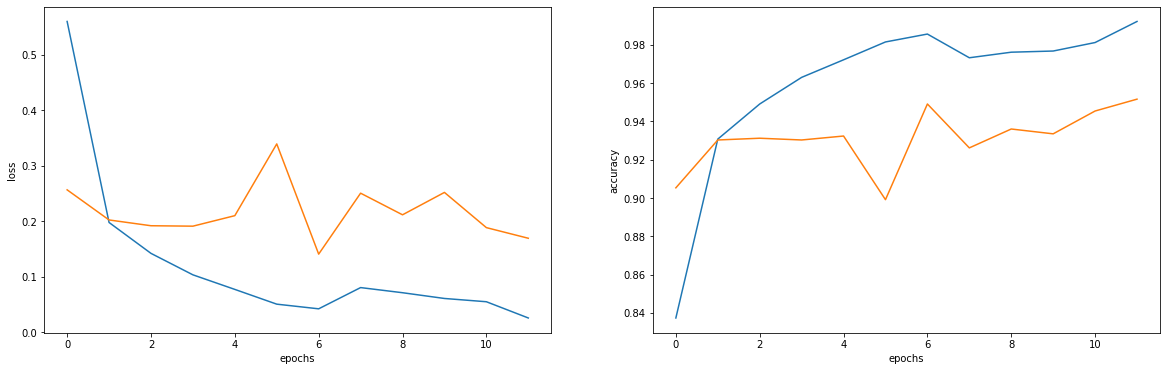

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

### Confusion matrix

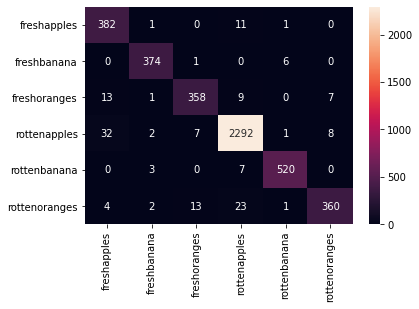

In [ ]:
from sklearn.metrics import *
import seaborn as sns

y_pred_test = np.argmax(model.predict(x_test),axis=1)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            xticklabels=['freshapples', 'freshbanana','freshoranges','rottenapples','rottenbanana','rottenoranges'],
            yticklabels=['freshapples', 'freshbanana','freshoranges','rottenapples','rottenbanana','rottenoranges'])
plt.show()

## Performance

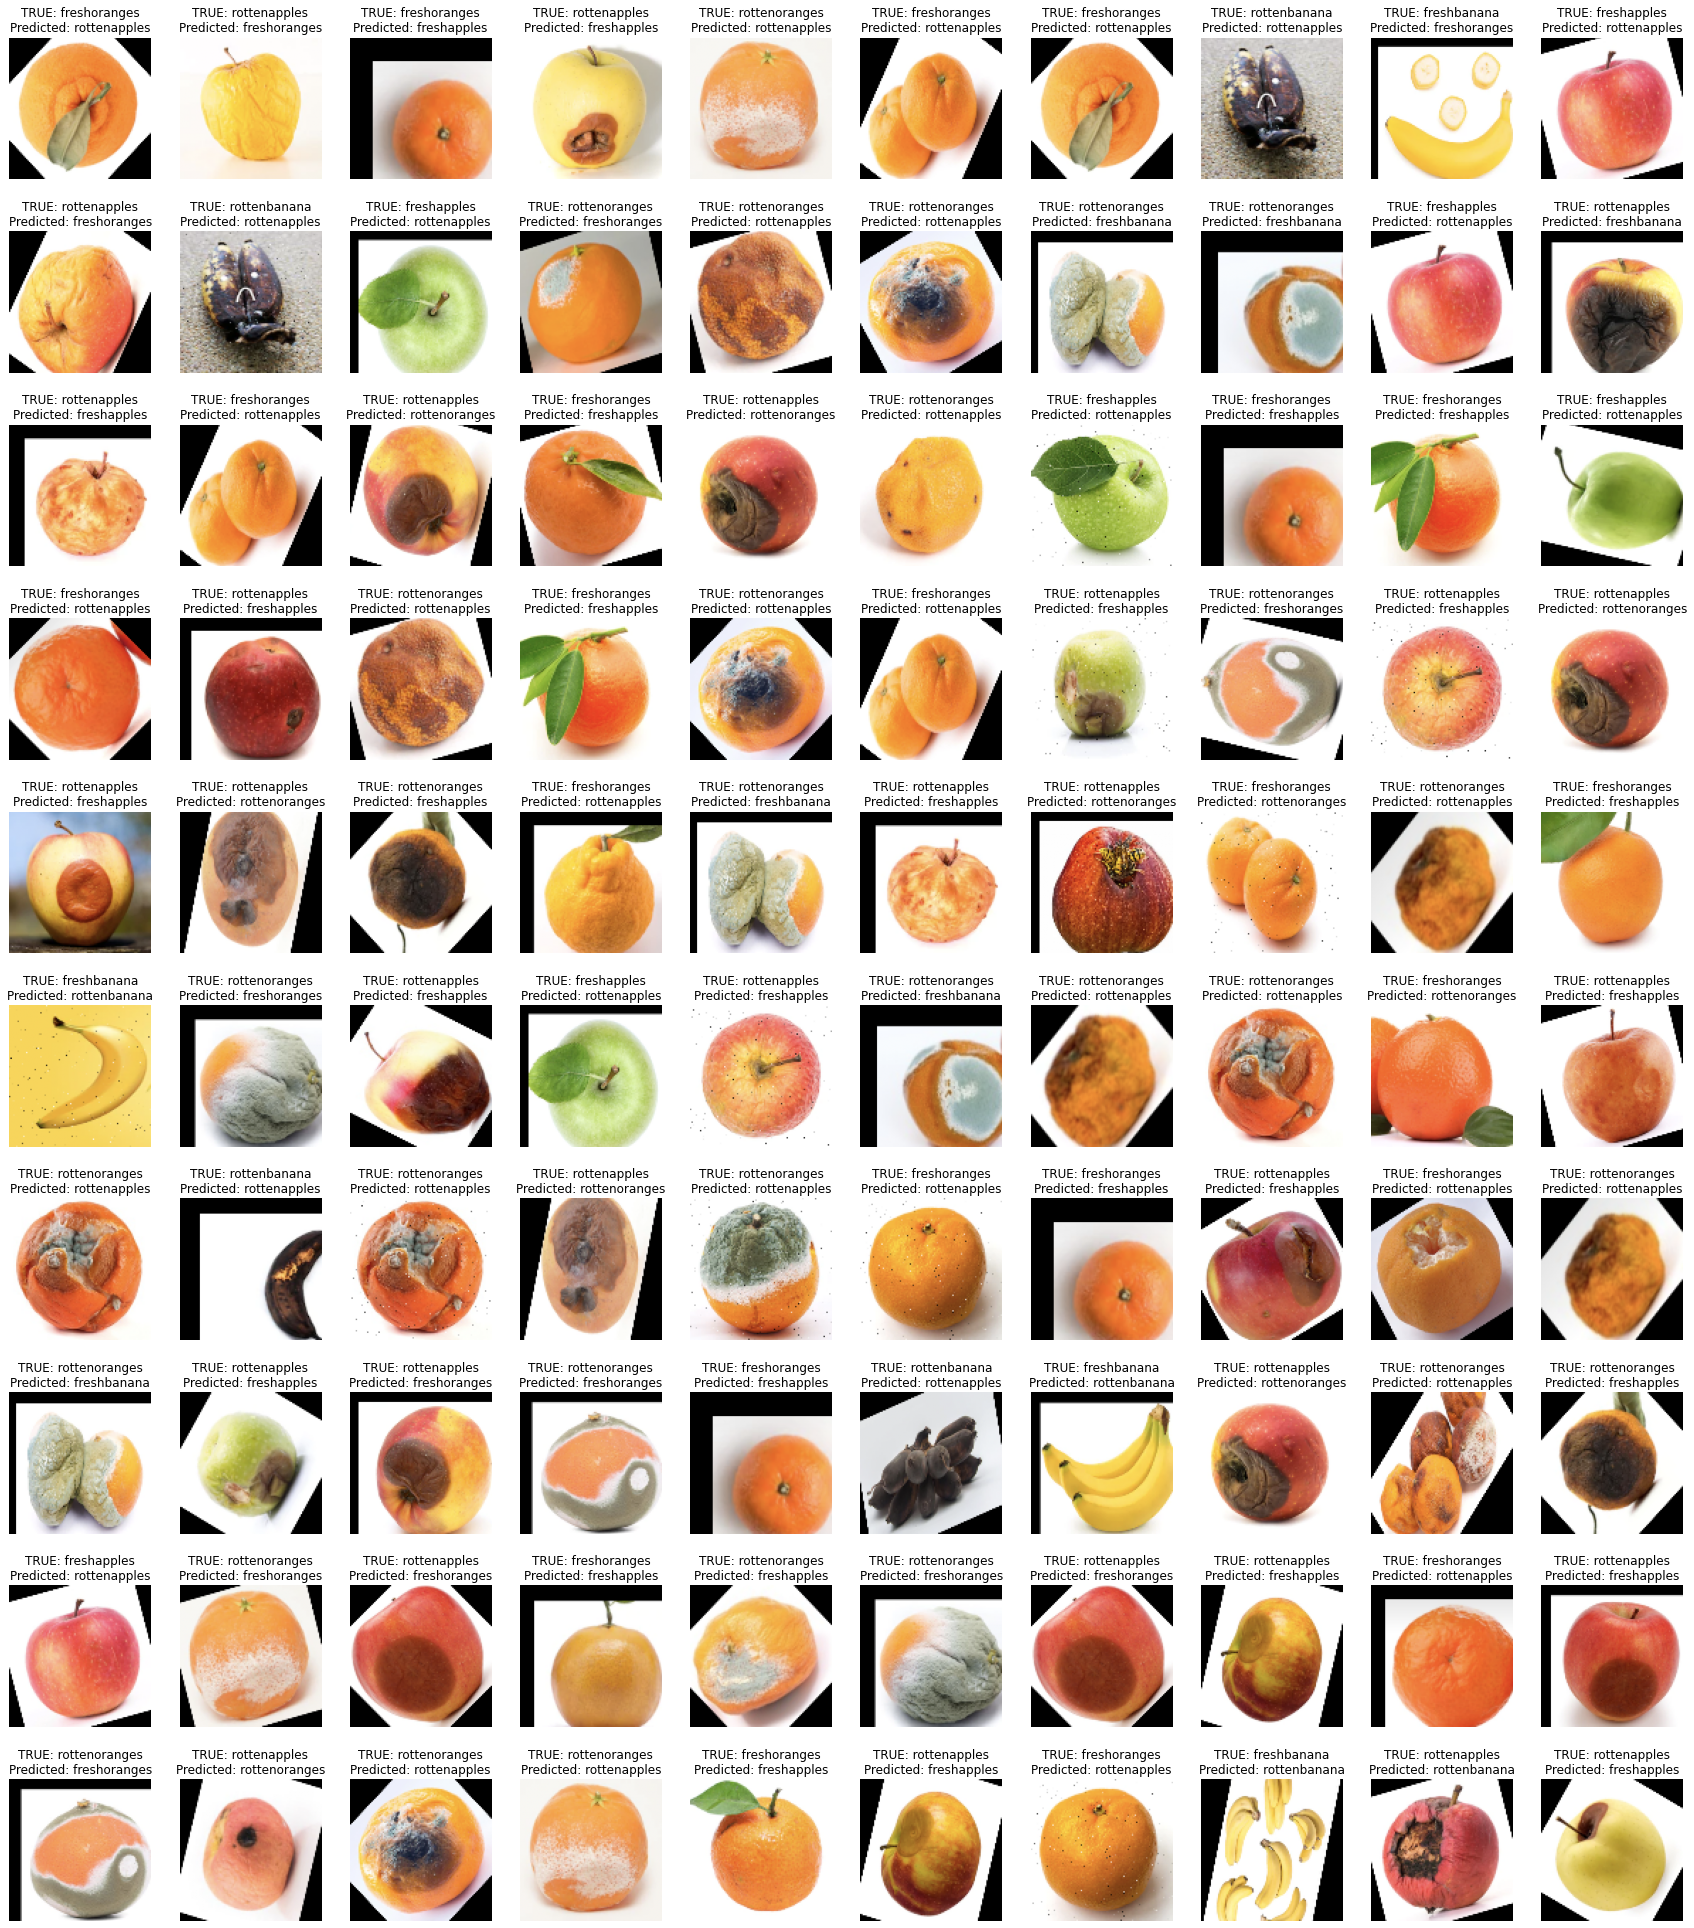

In [ ]:
wrong_predict = np.where(y_pred_test != np.squeeze(y_test))[0] # find where y_pred_test different from y_test
fig, axs = plt.subplots(10,10, figsize=(30,35))
for i in range(10):
  for j in range(10):
    target = np.random.choice(wrong_predict) # random 1 index in wrong_predict
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    axs[i][j].imshow(x_test[target])
    name = 'TRUE: {}\nPredicted: {}'.format(classes[y_test[target]], classes[y_pred_test[target]])
    axs[i][j].set_title(name)

## Save model

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
filepath = '/content/drive/My Drive/fruit_model'

In [ ]:
tf.keras.models.save_model(
    model,
    filepath
)

INFO:tensorflow:Assets written to: /content/drive/My Drive/fruit_model/assets


### Load model

In [ ]:
fruit_model = tf.keras.models.load_model(filepath)

## Demo

Saving fresh_banana_1.jpg to fresh_banana_1.jpg
Saving fresh_banana_2.jpg to fresh_banana_2.jpg
Saving fresh_orange_1.jpeg to fresh_orange_1.jpeg
Saving fresh_orange_2.jpeg to fresh_orange_2.jpeg
Saving fresh_orange_3.jpeg to fresh_orange_3.jpeg
Saving fresh_orange_4.jpeg to fresh_orange_4.jpeg
Saving fresh_orange_5.jpeg to fresh_orange_5.jpeg
Saving rotten_banana_1.jpeg to rotten_banana_1.jpeg
Saving rotten_banana_2.jpeg to rotten_banana_2.jpeg
Saving rotten_banana_3.jpeg to rotten_banana_3.jpeg


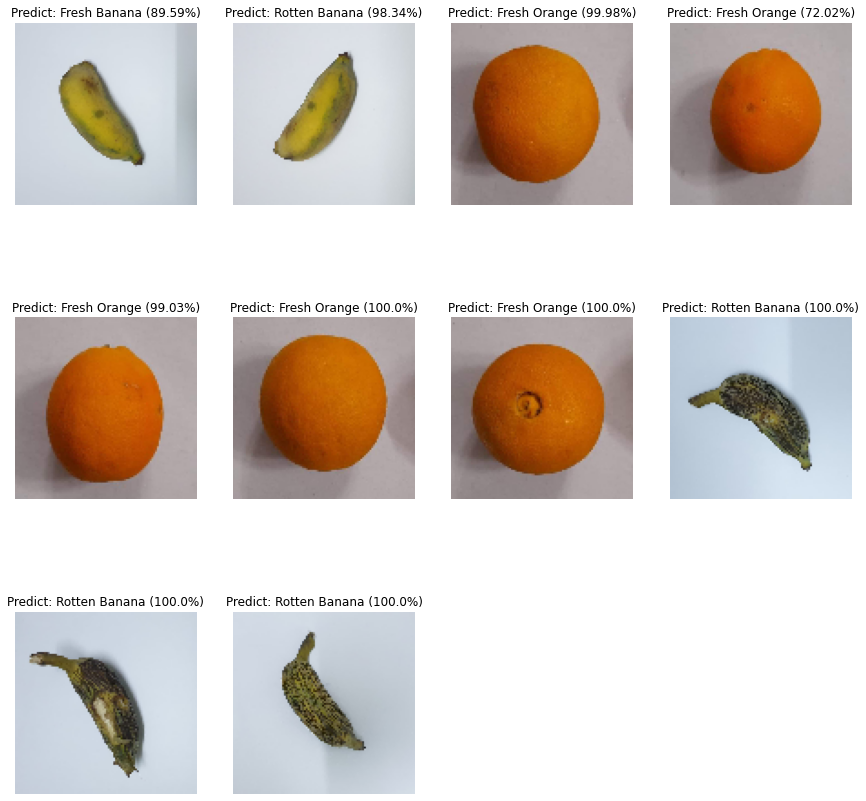

In [ ]:
import pathlib
from keras.utils import get_file
from keras.preprocessing import image

uploaded_file = files.upload()
img_name = []
img_conf = []
predict_result = []

for i in uploaded_file.keys():
  path = i
  img = image.load_img(path, color_mode="rgb", target_size=(100, 100), interpolation="nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = fruit_model.predict(images, batch_size=10)

  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Fresh Apple')
  elif np.where(classes[0] == max)[0] == 1:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Fresh Banana')
  elif np.where(classes[0] == max)[0] == 2:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Fresh Orange')
  elif np.where(classes[0] == max)[0] == 3:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Rotten Apple')
  elif np.where(classes[0] == max)[0] == 4:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Rotten Banana')
  else:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Rotten Orange')

plt.figure(figsize=(15, 15))
for i in range(len(img_name)):
  plt.subplot((len(img_name)/4)+1, 4, i+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(img_name[i], color_mode="rgb", target_size=(100, 100), interpolation="nearest"))
  title = f"Predict: {predict_result[i]} ({round(float(img_conf[i])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in img_name:
  os.system(f'rm {fn}')